In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
def FWHM(X,Y):
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = sign(half_max - array(Y[0:-1])) - sign(half_max - array(Y[1:]))
    #plt.plot(X,d) #if you are interested
    #find the left and right most indexes
    left_idx = find(d > 0)[0]
    right_idx = find(d < 0)[-1]
    return X[right_idx] - X[left_idx] #return the difference (full width)

In [63]:
def peak_area(data):
    fwhm=FWHM(data['x'], data['Curve1'])
    max_height=max(data['Curve1'])
    plt.plot(data['x'], data['Curve1'])
    return max_height*fwhm

0.184470433182


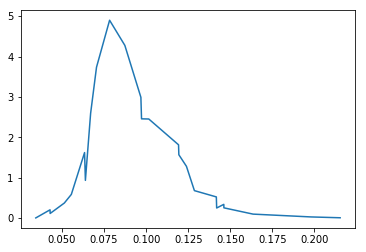

In [68]:
a=peak_area(pd.read_csv('peaks/0_086_red.csv', sep=','))
print(a)

In [70]:
red=[[],[]]
red[0].append(0.086)
red[1].append(a)

0.222876696


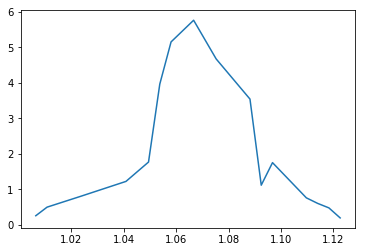

In [72]:
a = peak_area(pd.read_csv('peaks/1_063_red.csv', sep=','))
print(a)

In [73]:
red[0].append(1.063)
red[1].append(a)

0.0913213015


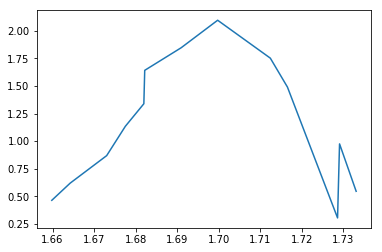

In [74]:
a=peak_area(pd.read_csv('peaks/1_693_red.csv', sep=','))
print(a)

In [75]:
red[0].append(1.693)
red[1].append(a)

0.0847320964


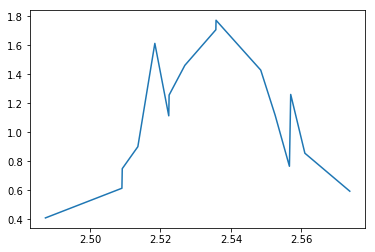

In [76]:
a=peak_area(pd.read_csv('peaks/2_537_red.csv', sep=','))
print(a)

In [77]:
red[0].append(2.537)
red[1].append(a)

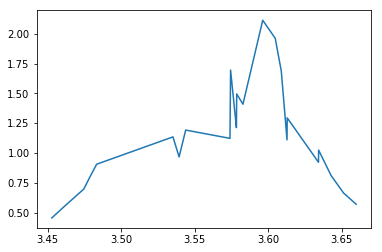

In [78]:
a=peak_area(pd.read_csv('peaks/3_589_red.csv', sep=','))

In [79]:
red[0].append(3.589)
red[1].append(a)

0.1905139754


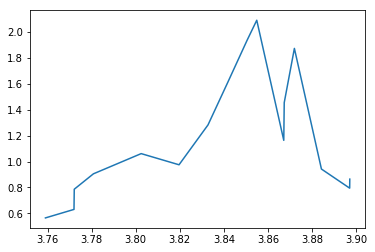

In [80]:
a=peak_area(pd.read_csv('peaks/3_848_red.csv', sep=','))
print(a)

In [81]:
red[0].append(3.848)
red[1].append(a)

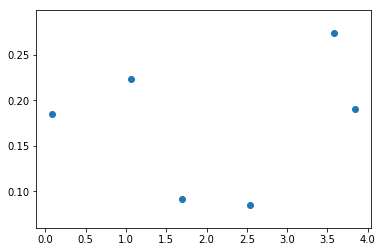

In [82]:
plt.scatter(red[0], red[1]) 

In [83]:
B_GT=pd.read_csv('clear_B(GT).csv', sep=',')
B_GT.head()

,Unnamed: 0,Ex,Jpi,diff cross-sec,B(GT)
0,1,86.0,1,1.173,1.20
1,2,120.0,1,0.318,0.33
2,3,265.0,1,0.113,0.10
3,5,500.0,"[1+, 2−]",0.621,0.45
4,31,513.8,1,0.725,0.71


In [84]:
B_GT_list = B_GT['B(GT)'].loc[B_GT['Ex'].isin(np.array(red[0])*1000)].values

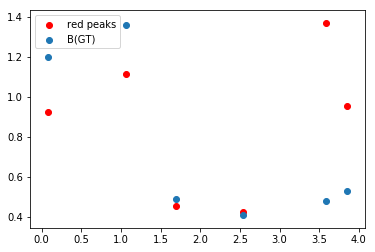

In [101]:
plt.scatter(red[0], np.array(red[1])*5, c='red', label='red peaks') 
plt.scatter(red[0], B_GT_list, label='B(GT)')
plt.legend()

In [116]:
data=pd.read_csv('peaks/red/3.848', sep=',')
data.head()

,x,Curve1
0,3.75903,0.565188
1,3.77200,0.630717
2,3.77212,0.786348
3,3.78082,0.905119
4,3.80249,1.060750


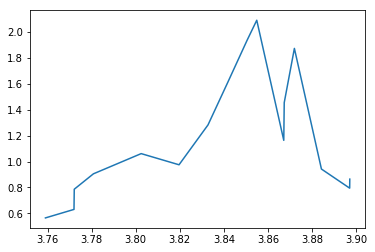

In [117]:
plt.plot(data['x'], data['Curve1'])

In [118]:
import scipy.optimize as opt

def gauss(x, p): # p[0]==mean, p[1]==stdev
    return 1.0/(p[1]*np.sqrt(2*np.pi))*np.exp(-(x-p[0])**2/(2*p[1]**2))

In [122]:
p0 = [3.84,1] # Inital guess is a normal distribution
errfunc = lambda p, x, y: gauss(x, p) - y # Distance to the target function
p1, success = opt.leastsq(errfunc, p0[:], args=(X, Y))

fit_mu, fit_stdev = p1

FWHM = 2*np.sqrt(2*np.log(2))*fit_stdev
print ("FWHM", FWHM)

FWHM 1.99349756472


In [123]:
p1

array([ 1.99958279,  0.84656047])

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 394
    # data points      = 16
    # variables        = 3
    chi-square         = 1.172
    reduced chi-square = 0.090
    Akaike info crit   = -35.819
    Bayesian info crit = -33.501
[[Variables]]
    amp:   0.20989318 +/- 0.021463 (10.23%) (init= 1)
    cen:   3.84437407 +/- 0.005649 (0.15%) (init= 1)
    wid:   0.05188658 +/- 0.006746 (13.00%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, wid)                  =  0.802 
    C(cen, wid)                  =  0.313 
    C(amp, cen)                  =  0.175 



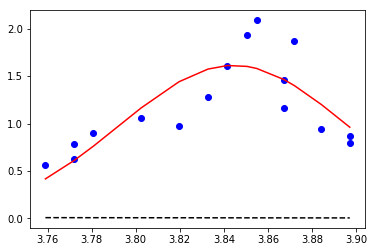

In [135]:
from numpy import sqrt, pi, exp, linspace
from lmfit import  Model

import matplotlib.pyplot as plt


def gaussian(x, amp, cen, wid):
    "1-d gaussian: gaussian(x, amp, cen, wid)"
    return (amp/(sqrt(2*pi)*wid)) * exp(-(x-cen)**2 /(2*wid**2))

gmodel = Model(gaussian)

x=data['x'].values
y=data['Curve1'].values

centr=data['x'].values[np.argmax( data['Curve1'].values )]
ampl=np.max( data['Curve1'].values )

#params = params = gmod.make_params(cen=cen, amp=amp, wid=1)
result = gmodel.fit(y, x=x, cen=1, amp=1, wid=1)

print(result.fit_report())

plt.plot(x, y,         'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()

In [136]:
result.values

{'amp': 0.20989318783167041,
 'cen': 3.8443740749447355,
 'wid': 0.05188658957258626}

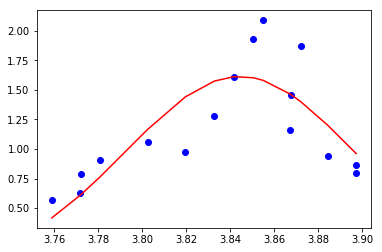

In [137]:
plt.plot(x, y,         'bo')
#plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()

In [138]:
result.values['wid']

0.05188658957258626